In [205]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [206]:
data = pickle.load(open("ip_log.jpg", "rb"))

In [207]:
ip_list = []
country_list = []
function_list = []
time_list = []
year_list = []
month_list = []

In [208]:
for i in range(len(data)):
    for j in range(len(data[i])):
        if(j%4 == 0):
            ip_list.append(data[i][j])
        elif(j%4 == 1):
            country_list.append(data[i][j])
        elif(j%4 == 2):
            function_list.append(data[i][j])
        elif(j%4 == 3):
            time_list.append(data[i][j])
            year_list.append(data[i][j].year)
            month_list.append(data[i][j].month)
            
df_ip = pd.DataFrame(ip_list, columns=['ip'])
df_country = pd.DataFrame(country_list, columns=['country'])
df_function = pd.DataFrame(function_list, columns=['function'])
df_year = pd.DataFrame(year_list, columns=['year'])
df_month = pd.DataFrame(month_list, columns=['month'])

In [209]:
data_df = pd.concat([df_ip, df_country, df_function, df_year, df_month], axis = 1)

In [243]:
function_df = data_df.groupby("function")["ip"].count().reset_index(name="count").set_index("function")

In [244]:
function_df

,count
function,
Cell_Line_Expression,158
Cell_Line_List,115
Clinical_Expression,18
Heatmap,29
PCA,15
Upload,2


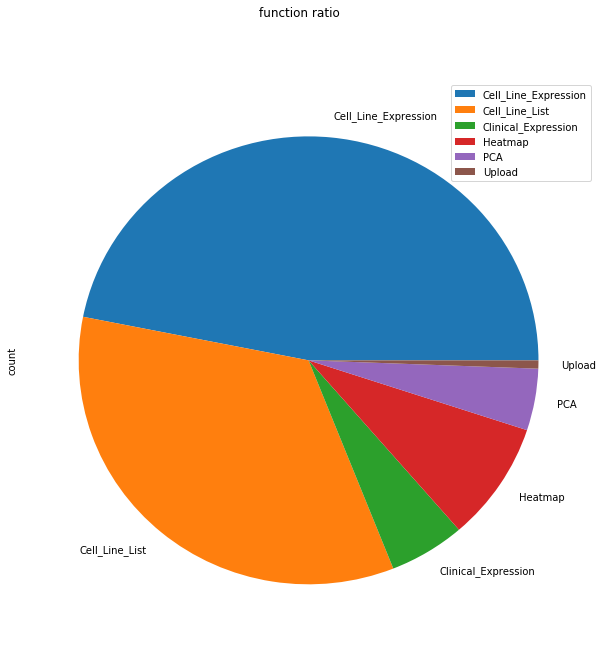

In [245]:
function_plot = function_df.plot(subplots=True, kind = "pie",title='function ratio', figsize=(10.3, 10.3))

In [255]:
data_sort_time_country_df = data_df.groupby(['year', 'month'])["ip"].count().reset_index(name="count").sort_values(["year", "month"])

In [256]:
append_column = []

In [257]:
for i in range(4):
    append_column.append(str(data_sort_time_country_df["year"][i]) + '/' + str(data_sort_time_country_df["month"][i]))

In [258]:
append_column

['2017/12', '2018/1', '2018/2', '2018/3']

In [259]:
data_sort_time_country_df["Year/Month"] = append_column

In [260]:
data_sort_time_country_df

,year,month,count,Year/Month
0,2017,12,11,2017/12
1,2018,1,112,2018/1
2,2018,2,158,2018/2
3,2018,3,56,2018/3


In [264]:
year_month_df = data_sort_time_country_df.set_index("Year/Month").drop(columns = ["year", "month"])

In [265]:
year_month_df

,count
Year/Month,
2017/12,11
2018/1,112
2018/2,158
2018/3,56


Text(0,0.5,'Year/Month')

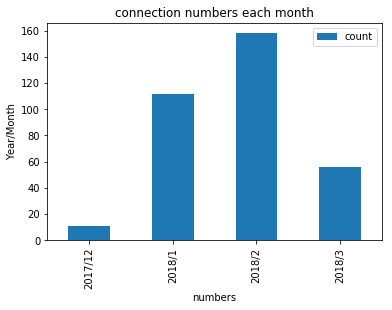

In [266]:
year_month_plot = year_month_df.plot(lw=2,kind = "bar",title='connection numbers each month')

year_month_plot.set_xlabel("numbers")

year_month_plot.set_ylabel("Year/Month")

In [267]:
data_sort_country = data_df.groupby(['country'])["ip"].count().reset_index(name="count")

In [268]:
connect_count = 0
for index, row in data_sort_country.iterrows():
    connect_count += row['count']

In [269]:
data_sort_country.at[14, 'country'] = 'Others'

In [270]:
data_sort_country['ratio'] = (round(data_sort_country['count'] / connect_count*100, 2)).astype(str) + '%'
data_sort_country['ratio(%)'] = round(data_sort_country['count'] / connect_count*100, 2)
data_sort_country['ratio'] = data_sort_country['ratio'].astype(str)

In [271]:
data_sort_country

,country,count,ratio,ratio(%)
0,Argentina,2,0.59%,0.59
1,Australia,21,6.23%,6.23
2,Brazil,16,4.75%,4.75
3,Canada,2,0.59%,0.59
4,China,6,1.78%,1.78
5,Colombia,8,2.37%,2.37
6,Czechia,1,0.3%,0.30
7,Estonia,1,0.3%,0.30
8,France,20,5.93%,5.93
9,Germany,5,1.48%,1.48


## Practice

In [226]:
import os
import folium
import json
import geopandas

In [227]:
world_json = os.path.join('/Users/Kuan-Hao/Documents/大二下/專題研究-莊曜宇/hw_2', 'custom.geo_low.json')

In [272]:
geo_json_data = json.load(open(world_json))
kw = {'location': [48, -102], 'zoom_start': 3}

In [273]:
gdf = geopandas.read_file(world_json)

In [285]:
from branca.colormap import linear

colormap = linear.YlGn.scale(
    0,
    data_sort_country['ratio(%)'].max())

print(colormap(7.0))

colormap

#9cd687


In [275]:
world_country_df = gdf['name'].to_frame(name = 'country')

In [276]:
world_country_df

,country
0,Fiji
1,Australia
2,New Caledonia
3,New Zealand
4,Papua New Guinea
5,Solomon Is.
6,Vanuatu
7,Albania
8,Austria
9,Belgium


In [277]:
merge_map_df = pd.merge(world_country_df, data_sort_country, how = 'left', on = ['country'])

In [278]:
merge_map_df

,country,count,ratio,ratio(%)
0,Fiji,NaN,NaN,NaN
1,Australia,21.0,6.23%,6.23
2,New Caledonia,NaN,NaN,NaN
3,New Zealand,NaN,NaN,NaN
4,Papua New Guinea,NaN,NaN,NaN
5,Solomon Is.,NaN,NaN,NaN
6,Vanuatu,NaN,NaN,NaN
7,Albania,NaN,NaN,NaN
8,Austria,NaN,NaN,NaN
9,Belgium,NaN,NaN,NaN


In [279]:
for index, row in merge_map_df.iterrows():
    if(np.isnan(row['ratio(%)'])):
        merge_map_df.at[index, 'ratio(%)'] = 0

In [280]:
merge_map_df

,country,count,ratio,ratio(%)
0,Fiji,NaN,NaN,0.00
1,Australia,21.0,6.23%,6.23
2,New Caledonia,NaN,NaN,0.00
3,New Zealand,NaN,NaN,0.00
4,Papua New Guinea,NaN,NaN,0.00
5,Solomon Is.,NaN,NaN,0.00
6,Vanuatu,NaN,NaN,0.00
7,Albania,NaN,NaN,0.00
8,Austria,NaN,NaN,0.00
9,Belgium,NaN,NaN,0.00


In [281]:
ratio_dictionary = merge_map_df.set_index('country')['ratio(%)']

In [282]:
merge_map_df[~np.isnan(merge_map_df['count'])].sort_values('country')

,country,count,ratio,ratio(%)
64,Argentina,2.0,0.59%,0.59
1,Australia,21.0,6.23%,6.23
67,Brazil,16.0,4.75%,4.75
47,Canada,2.0,0.59%,0.59
84,China,6.0,1.78%,1.78
68,Colombia,8.0,2.37%,2.37
18,Estonia,1.0,0.3%,0.30
21,France,20.0,5.93%,5.93
15,Germany,5.0,1.48%,1.48
22,Greece,6.0,1.78%,1.78


In [283]:
m = folium.Map(
    [43, -100], 
    zoom_start=4,
    world_copy_jump=True,
    no_wrap=False,)

geojson = folium.GeoJson(
    geo_json_data,
    name = 'ratio of usage',
    highlight_function=lambda feature: {
        'fillColor': colormap(ratio_dictionary[feature['properties']['name']]),
        'color': 'black',
        'weight': 2,
        'fillOpacity': 1.5,
    },
    style_function=lambda feature: {
        'fillColor': colormap(ratio_dictionary[feature['properties']['name']]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    }
)
geojson.add_to(m)

# m.choropleth(
#     geo_data=geopandas.read_file(world_json),
# #     data=state_data,
# #     columns=['State', 'Unemployment'],
# #     key_on='feature.id',
#     fill_color='grey',
#     fill_opacity=0.7,
#     line_opacity=0.2,
# #     legend_name='Unemployment Rate (%)',
#     highlight=True
# )

colormap.caption = 'Flow rate color scale'
colormap.add_to(m)
m.save(os.path.join('/Users/Kuan-Hao/Desktop', 'GeoJSON_and_choropleth_3.html'))

In [284]:
m